In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index = pd.read_table('top50genes.txt', header=None, index_col=0)
print(index.shape)
index.head()

(50, 0)


""
0
GPP2
STL1
HXT1
AQR1
OAC1


In [3]:
nc = pd.read_table('deseq_res/norm-matrix-deseq2.txt', index_col=0)
print(nc.shape)
nc.head()

(6420, 4)


,X16.bam,X17.bam,X18.bam,X19.bam
id,,,,
PAU8,9.438868,8.581297,6.358430,5.145070
YAL067W-A,0.000000,0.000000,0.000000,0.000000
SEO1,78.207764,37.006843,15.896075,9.432629
YAL065C,7.416253,1.608993,6.358430,2.572535
YAL064W-B,0.674205,1.608993,0.000000,0.000000


In [4]:
#nc.loc[index.index, :].to_csv('Top50_expression.csv')

In [5]:
res = pd.read_table('deseq_res/result.txt', index_col=0)
print(res.shape)
res.head()

(6420, 7)


,id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GPP2,GPP2,16729.875894,7.899953,0.408404,19.343467,2.313833e-83,1.344800e-79
STL1,STL1,10088.387566,7.874257,0.411571,19.132205,1.361891e-81,3.957655e-78
HXT1,HXT1,8495.183817,7.881624,0.432049,18.242429,2.376577e-74,4.604222e-71
AQR1,AQR1,2109.592516,7.785356,0.466923,16.673756,2.034003e-62,2.955407e-59
OAC1,OAC1,1727.165761,7.269328,0.482440,15.067830,2.636299e-51,3.064434e-48


In [11]:
df = pd.DataFrame(index = res.index)

for col in [f'X{n}.bam' for n in range(16, 20)]:
    df[col] = nc.loc[res.index, col] >= res.loc[res.index, 'baseMean']
df['pval'] = res['pvalue']

df = df.sort_values('pval')

topup = df[(df.iloc[:, 0] == True)]
topdown = df[(df.iloc[:, 3] == True)]

In [12]:
topdown

,X16.bam,X17.bam,X18.bam,X19.bam,pval
GPP2,False,False,True,True,2.313833e-83
STL1,False,False,True,True,1.361891e-81
HXT1,False,False,True,True,2.376577e-74
AQR1,False,False,True,True,2.034003e-62
OAC1,False,False,True,True,2.636299e-51
RPS28B,False,False,True,True,7.142461e-51
ALB1,False,False,True,True,9.277254e-51
NSR1,False,False,True,True,1.035378e-50
DBP2,False,False,True,True,2.436415e-50
FSF1,False,False,True,True,1.680989e-47


In [13]:
topup.iloc[:50, :].to_csv('TopUP50.csv')

In [14]:
topdown.iloc[:50, :].to_csv('TopDOWN50.csv')

/home/dmitry/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


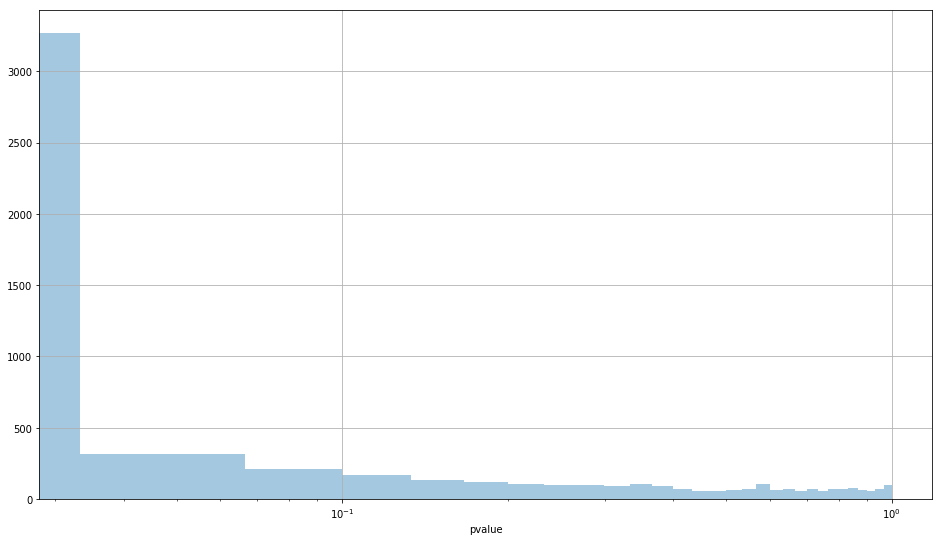

In [37]:
fig, ax = plt.subplots(figsize=[16, 9])
sns.distplot(res['pvalue'][np.logical_not(res['pvalue'].isna())], 
             ax=ax, kde=False, norm_hist=False)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid()

In [39]:
(res['pvalue'] <= 0.05).sum()

3446

In [40]:
(res['pvalue'] <= 0.01).sum()

2848

In [41]:
(res['pvalue'] <= 0.001).sum()

2323

In [42]:
(res['pvalue'] <= 0.0001).sum()

1922

In [43]:
(res['pvalue'] <= 0.1).sum()

3795

In [28]:
res['pvalue'][np.logical_not(res['pvalue'].isna())]

GPP2         2.313833e-83
STL1         1.361891e-81
HXT1         2.376577e-74
AQR1         2.034003e-62
OAC1         2.636299e-51
RPS28B       7.142461e-51
NSR1         1.035378e-50
ALB1         9.277254e-51
DBP2         2.436415e-50
FSF1         1.680989e-47
PRM10        1.356344e-44
YJL107C      4.251518e-44
PDE2         5.968512e-44
TRM11        1.010221e-43
PFK27        9.222892e-43
LCP5         7.661531e-42
SAM1         2.926751e-41
RSA4         4.224419e-41
AAH1         4.525091e-41
RRN11        2.025688e-40
ADE4         4.853737e-40
SNU13        3.290636e-39
VTS1         4.615010e-39
SSF1         7.170301e-39
YGR079W      9.561645e-39
SQT1         7.572400e-38
NOP12        1.271454e-37
RPA34        1.263005e-37
TMA10        1.711238e-37
GRE2         4.398251e-37
                 ...     
PAU9         7.087005e-01
tV(AAC)G1    6.836912e-01
YAL064W-B    6.278730e-01
YPR108W-A    4.294747e-01
YEL076C      6.037438e-01
YGL034C      6.037438e-01
YHR213W      6.037438e-01
SUF10       

In [22]:
res['pvalue'].max()

0.99916144295864295